In [9]:
from importlib import reload
import model_functions
reload(model_functions)
from model_functions import plot_ground_heigth, plot_alpha_scores, fit_model_with_files, load_and_prepare_data, calculate_maneuver_recall
import file_functions
reload(file_functions)
from file_functions import get_filepaths_in_folder_with_ending
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
# 1. Visualize preprocessed flight data

# 3. Visualize the data

data_dir = "train_data"
flight_id = '08412468-26ac-4777-9afb-4671f426277b'

parquet_path = os.path.join('..', 'data_process', data_dir, f"{flight_id}.parquet")

df = pd.read_parquet(parquet_path)

#df.info()
print(df.head())

In [10]:
data_dir = "train_data"
flight_id = '08412468-26ac-4777-9afb-4671f426277b'

parquet_path = os.path.join('..', 'data_process', data_dir, f"{flight_id}.parquet")

df = pd.read_parquet(parquet_path)

#df.info()
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '..\\data_process\\train_data\\08412468-26ac-4777-9afb-4671f426277b.parquet'

In [ ]:
print(df.columns)
print(df.index)

Index(['6417134', '28827303', '45268905', '108790465', '117182271',
       '156751662', '156875280', '192589766', '203733126', '301190512',
       ...
       '4096114806', '4096188490', '4174711423', '4210968644', '4211937095',
       '4233706951', '4247030081', '4264003232', '4294814812', 'Label'],
      dtype='object', length=190)
MultiIndex([('2024-02-14 06:46:58.397576+00:00',      0),
            ('2024-02-14 06:46:58.416348+00:00',      1),
            ('2024-02-14 06:47:00.886922+00:00',      2),
            ('2024-02-14 06:47:00.894921+00:00',      3),
            ('2024-02-14 06:47:00.926924+00:00',      4),
            ('2024-02-14 06:47:00.946964+00:00',      5),
            ('2024-02-14 06:47:00.950532+00:00',      6),
            ('2024-02-14 06:47:00.961775+00:00',      7),
            ('2024-02-14 06:47:00.978790+00:00',      8),
            ('2024-02-14 06:47:00.984390+00:00',      9),
            ...
            ('2024-02-14 07:03:21.102460+00:00', 253960),
           

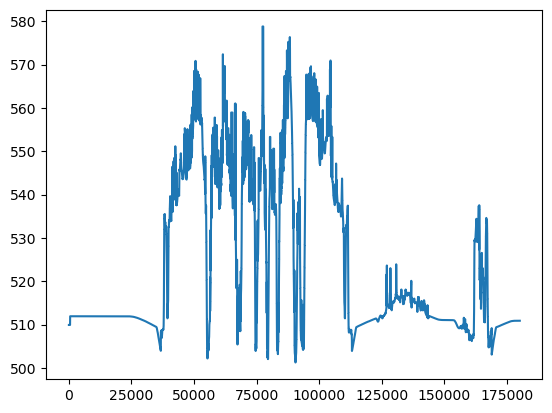

In [ ]:
plot_ground_heigth(df)

# 2. Read Label from preprocessed data

In [11]:
data_dir = "train_data"
flight_id = '0bbf0c4e-fb3c-4213-bff8-ef21ee5ebf79'
data_dir_path = os.path.join('..', 'data_process', data_dir)
parquet_path = os.path.join(data_dir_path, f"{flight_id}.parquet")
df = pd.read_parquet(parquet_path)

label_path = os.path.join(data_dir_path, f"{flight_id}.csv")
labels = pd.read_csv(label_path)
maneuvers = np.unique(labels["maneuver"])

print(maneuvers)
print(df['Label'])


['Climb' 'Descent' 'Hover' 'Left Turn' 'No Maneuver' 'Right Turn'
 'Straight and Level']
TimeStamp                         FrameCounter
2024-02-15 08:12:07.277872+00:00  0               no maneuver
2024-02-15 08:12:07.289546+00:00  1               no maneuver
2024-02-15 08:12:09.829034+00:00  2               no maneuver
2024-02-15 08:12:09.838211+00:00  3               no maneuver
2024-02-15 08:12:09.867992+00:00  4               no maneuver
                                                     ...     
2024-02-15 08:28:40.140542+00:00  259788          no maneuver
2024-02-15 08:28:40.151965+00:00  259789          no maneuver
2024-02-15 08:28:40.161623+00:00  259790          no maneuver
2024-02-15 08:28:40.173315+00:00  259791          no maneuver
2024-02-15 08:28:40.185377+00:00  259792          no maneuver
Name: Label, Length: 189764, dtype: object


In [ ]:
print(df.head())

                                                6417134  28827303  45268905  \
TimeStamp                        FrameCounter                                 
2024-02-15 08:12:07.277872+00:00 0             0.465298       0.0       0.0   
2024-02-15 08:12:07.289546+00:00 1             0.465298       0.0       0.0   
2024-02-15 08:12:09.829034+00:00 2             0.465298       0.0       0.0   
2024-02-15 08:12:09.838211+00:00 3             0.465298       0.0       0.0   
2024-02-15 08:12:09.867992+00:00 4             0.465298       0.0       0.0   

                                               108790465  117182271  \
TimeStamp                        FrameCounter                         
2024-02-15 08:12:07.277872+00:00 0                  75.0   1.567354   
2024-02-15 08:12:07.289546+00:00 1                  75.0   1.567354   
2024-02-15 08:12:09.829034+00:00 2                  75.0   1.567354   
2024-02-15 08:12:09.838211+00:00 3                  75.0   1.567354   
2024-02-15 08:12:09.

# 3. Time-Series modifications

In [ ]:
#TODO Time-Series specific data manipulation required ?

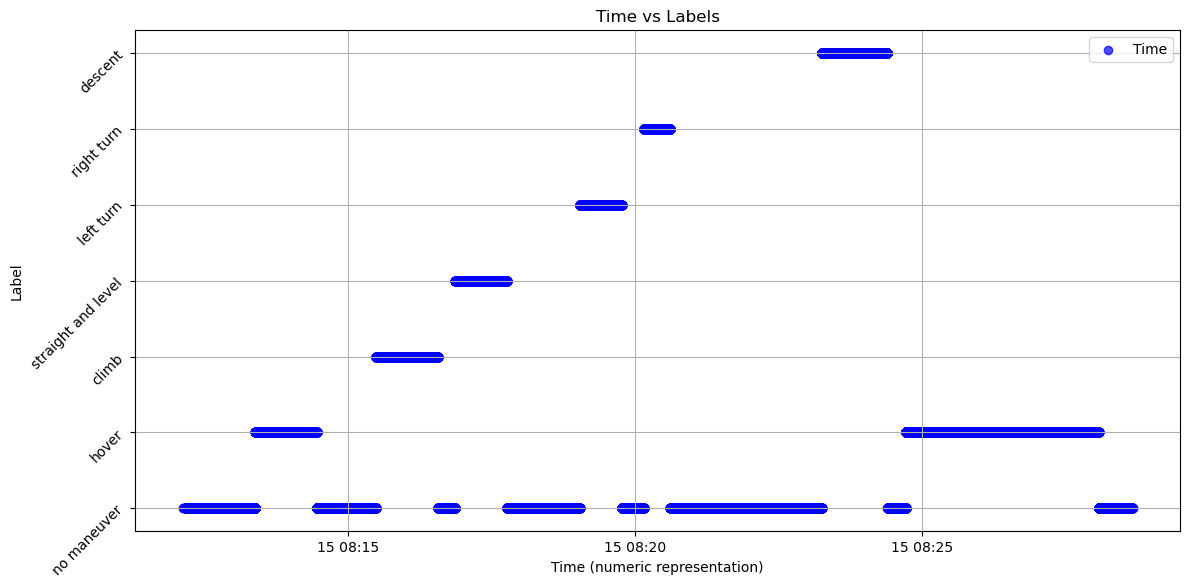

In [ ]:
# Plotting start_time + end_time vs label
plt.figure(figsize=(12, 6))

# Convert start and end times to numeric for plotting
numeric_time = pd.to_datetime(df.index.get_level_values('TimeStamp'))

# Scatter plot for start and end times with labels
plt.scatter(numeric_time,df['Label'], label='Time', alpha=0.7, color='blue')

# Format plot
plt.title("Time vs Labels")
plt.xlabel("Time (numeric representation)")
plt.ylabel("Label")
plt.legend()
plt.grid()
plt.yticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
# Load the Parquet data
file_path = '../data_process/train_data/0bbf0c4e-fb3c-4213-bff8-ef21ee5ebf79.parquet'
parquet_data = pd.read_parquet(file_path)

# Ensure TimeStamp is a datetime index for time-based operations
parquet_data.index = pd.to_datetime(parquet_data.index.get_level_values('TimeStamp'))

# Parameters for sliding window
window_size = '60s'  # 60-second time window
step_size = '30s'    # 30-second step size for sliding window


# Function to extract features from each block
def extract_features(block):
    features = {}
    for col in block.columns:
        if block[col].dtype in ['float64', 'int64']:  # Only process numeric columns
            features[f'{col}_mean'] = block[col].mean()
            features[f'{col}_std'] = block[col].std()
            features[f'{col}_max'] = block[col].max()
            features[f'{col}_min'] = block[col].min()
    # Adding block start and end timestamps for reference
    features['start_time'] = block.index[0]
    features['end_time'] = block.index[-1]
    features['most_frequent_label'] = block['Label'].mode()[0]
    return features

# Sliding window processing
blocks = []
start_time = parquet_data.index.min()

while start_time <= parquet_data.index.max():
    # Define the time window
    end_time = start_time + pd.Timedelta(window_size)
    
    # Select data within the time window
    block = parquet_data.loc[start_time:end_time]
    if not block.empty:
        blocks.append(extract_features(block))
    
    # Slide the window forward
    start_time += pd.Timedelta(step_size)


# Create a DataFrame from the extracted features
features_df = pd.DataFrame(blocks)

print(features_df.head())

   6417134_mean   6417134_std  6417134_max  6417134_min  28827303_mean  \
0      0.465298  2.614724e-14     0.465298     0.465298            0.0   
1      0.465298  1.386163e-13     0.465298     0.465298            0.0   
2      0.465298  1.761424e-13     0.465298     0.465298            0.0   
3      0.465298  1.748656e-13     0.465298     0.465298            0.0   
4      0.465298  1.348970e-13     0.465298     0.465298            0.0   

   28827303_std  28827303_max  28827303_min  45268905_mean  45268905_std  ...  \
0           0.0           0.0           0.0            0.0           0.0  ...   
1           0.0           0.0           0.0            0.0           0.0  ...   
2           0.0           0.0           0.0            0.0           0.0  ...   
3           0.0           0.0           0.0            0.0           0.0  ...   
4           0.0           0.0           0.0            0.0           0.0  ...   

   4264003232_std  4264003232_max  4264003232_min  4294814812_mean  

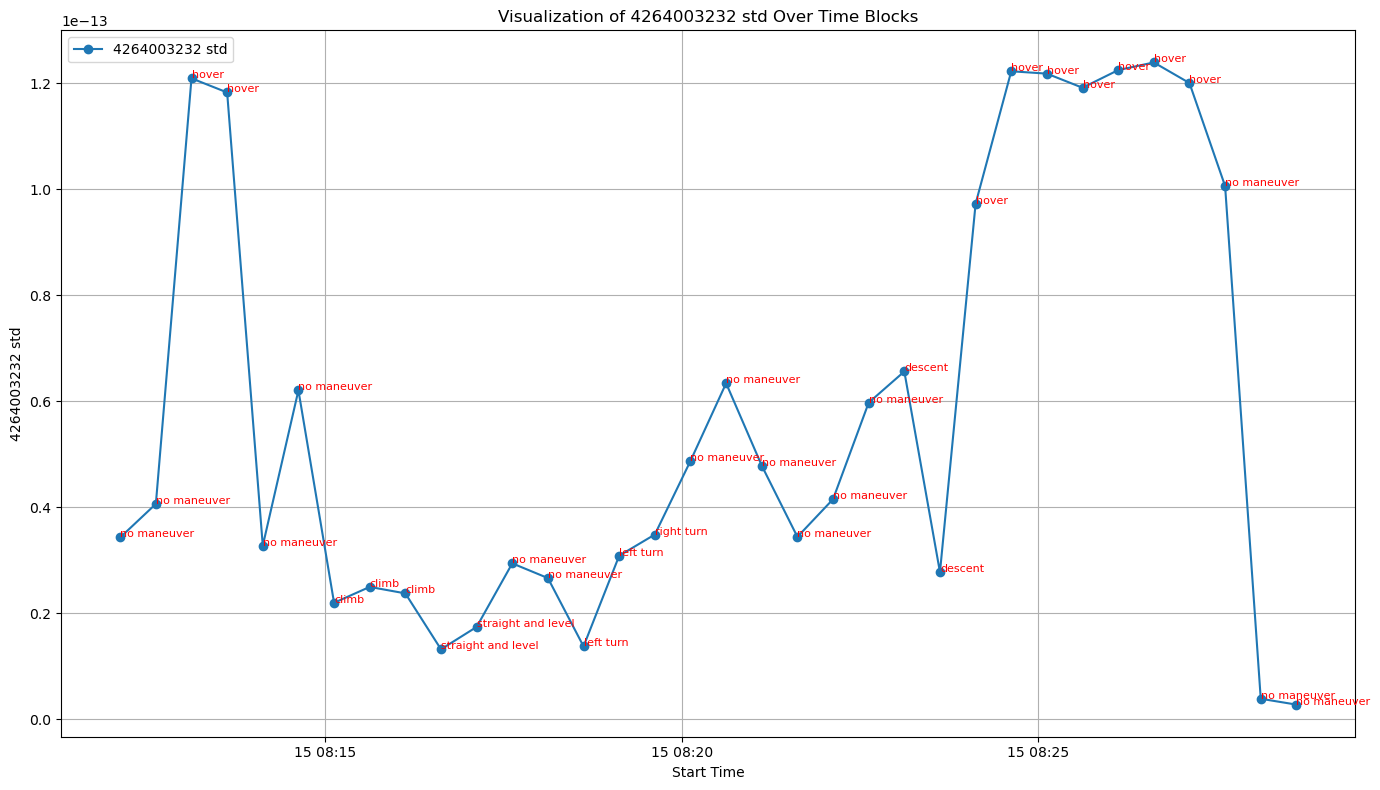

In [ ]:
#example vusalization
def visualize_features_over_time(features_df, feature_prefix="4264003232"):
    plt.figure(figsize=(14, 8))

    # Extract mean values for a specific feature prefix
    mean_col = f"{feature_prefix}_std"
    if mean_col not in features_df.columns:
        print(f"Feature {mean_col} not found in DataFrame.")
        return

    # Plot mean values over time
    plt.plot(features_df['start_time'], features_df[mean_col], label=f"{feature_prefix} std", marker='o')

    # Annotate with most frequent labels
    for i, label in enumerate(features_df['most_frequent_label']):
        plt.text(features_df['start_time'][i], features_df[mean_col][i], str(label), fontsize=8, color='red')

    # Plot formatting
    plt.title(f"Visualization of {feature_prefix} std Over Time Blocks")
    plt.xlabel("Start Time")
    plt.ylabel(f"{feature_prefix} std")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualize feature '6417134_mean'
visualize_features_over_time(features_df, feature_prefix="4264003232")

In [ ]:
#Run for all files


# 4. Lasso model and k-fold cross validation

Fit a linear regression classification lasso model and find the best alpha-parameter with the k-fold cross validation.
The goal of that is to get only the few most significant features, so that we can limit our preprocessing and future models to those columns.

In [12]:
# Load blocked data for training, validation, and testing
def load_blocked_data(file_paths):
    data_frames = [pd.read_csv(file) for file in file_paths]
    return pd.concat(data_frames, ignore_index=True)

In [13]:
# Get file paths for blocked data
def get_file_paths(folder, ending='.csv'):
    return [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(ending)]

In [14]:
# File paths for training, validation, and testing
train_file_paths = get_file_paths('../data_process/processed_with_blocks/train_data')
validate_file_paths = get_file_paths('../data_process/processed_with_blocks/validate_data')
test_file_paths = get_file_paths('../data_process/processed_with_blocks/test_data')

# Load blocked data
train_data = load_blocked_data(train_file_paths)
validate_data = load_blocked_data(validate_file_paths)
test_data = load_blocked_data(test_file_paths)

# Combine training and validation data
full_train_data = pd.concat([train_data, validate_data], ignore_index=True)

# Prepare features and labels
feature_columns = [col for col in full_train_data.columns if col not in ['start_time', 'end_time', 'most_frequent_label']]
X_train = full_train_data[feature_columns]
y_train = full_train_data['most_frequent_label']

In [15]:
model_train_file_paths = train_file_paths + validate_file_paths

In [16]:
possible_maneuvers = set()
maneuver_file_paths = np.concatenate((test_file_paths, validate_file_paths, train_file_paths))

for file in maneuver_file_paths:
    labels = pd.read_csv(file)
    possible_maneuvers.update(map(str.lower, np.unique(labels["most_frequent_label"])))

print(possible_maneuvers)
possible_maneuvers = list(possible_maneuvers)

{'descent', 'autorotation', 'no maneuver', 'straight and level', 'right turn', 'hover', 'left turn', 'climb'}


Alpha: 0.01, Score: 0.39195493308525764
Alpha: 0.02, Score: 0.39195493308525764
Alpha: 0.03, Score: 0.39195493308525764
Alpha: 0.04, Score: 0.39195493308525764
Alpha: 0.05, Score: 0.39195493308525764
Alpha: 0.1, Score: 0.2485375578687563
Alpha: 1, Score: 0.39195493308525764
Alpha: 3, Score: 0.39195493308525764
Alpha: 5, Score: 0.39195493308525764
Alpha: 7, Score: 0.24759555835861793
Alpha: 10, Score: 0.053910194429842635
Alpha: 20, Score: 0.05778370039660517
Alpha: 50, Score: 0.05111808343339728
Alpha: 100, Score: 0.05111808343339728
Alpha: 200, Score: 0.05111808343339728
Alpha: 500, Score: 0.05111808343339728
Alpha: 1000, Score: 0.05111808343339728
Best Alpha: 0.01, Best CV Score: 0.39195493308525764
Alpha Scores for Current Run: [(0.01, 0.39195493308525764), (0.02, 0.39195493308525764), (0.03, 0.39195493308525764), (0.04, 0.39195493308525764), (0.05, 0.39195493308525764), (0.1, 0.2485375578687563), (1, 0.39195493308525764), (3, 0.39195493308525764), (5, 0.39195493308525764), (7, 0.24

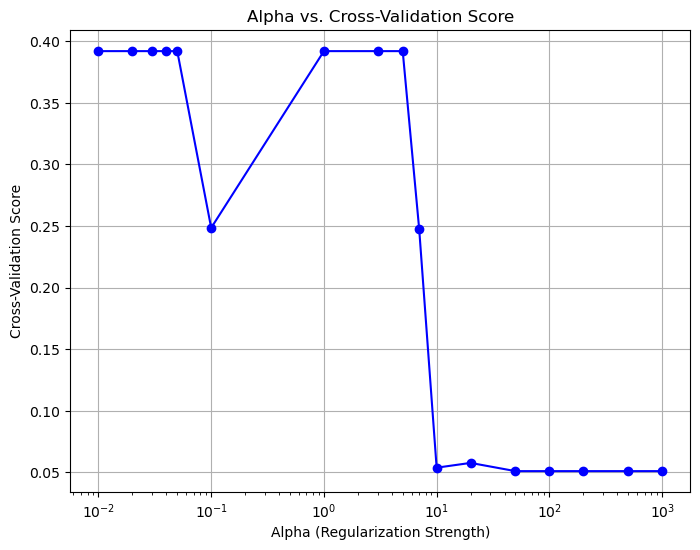

In [ ]:
# Define alphas and KFold
alphas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 1, 3, 5, 7, 10, 20, 50, 100, 200, 500, 1000]
kf = KFold(n_splits=4, shuffle=True, random_state=42)  # Add random_state for consistency

best_alpha = None
best_score = -np.inf
alpha_scores = []

for alpha in alphas:
    scores = []

    for train_idx, val_idx in kf.split(model_train_file_paths):
        # Get training and validation split file paths
        train_files = [model_train_file_paths[i] for i in train_idx]
        val_files = [model_train_file_paths[i] for i in val_idx]

        # Train model
        model = SGDClassifier(loss='log_loss', penalty='l1', alpha=alpha, random_state=42)
        columns = fit_model_with_files(model, train_files, possible_maneuvers)

        # Validate model
        val_scores = []
        for file in val_files:
            X, y = load_and_prepare_data(file)
            val_scores.append(model.score(X, y))

        scores.append(np.mean(val_scores))

    # Average score for the current alpha
    mean_score = np.mean(scores)
    alpha_scores.append((alpha, mean_score))
    print(f"Alpha: {alpha}, Score: {mean_score}")

    # Update the best alpha if needed
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

print(f"Best Alpha: {best_alpha}, Best CV Score: {best_score}")

# Debug: Print alpha scores
print("Alpha Scores for Current Run:", alpha_scores)

# Plot alpha scores
plot_alpha_scores(alpha_scores)


In [ ]:
final_model = SGDClassifier(loss='log_loss', penalty='l1', alpha=best_alpha)

columns = fit_model_with_files(final_model, model_train_file_paths, possible_maneuvers)

In [ ]:
coefficients = pd.DataFrame(final_model.coef_, columns=columns)

# identify unnecessary features (zero coefficients across all classes)
unnecessary_features = coefficients.columns[(coefficients == 0).all()].tolist()
print(f"Unnecessary: {len(unnecessary_features)}")

necessary_features = coefficients.columns[(coefficients != 0).any()].tolist()
print(f"Necessary: {len(necessary_features)}")
print(necessary_features)

Unnecessary: 277
Necessary: 479
['6417134_mean', '6417134_max', '6417134_min', '28827303_mean', '28827303_std', '28827303_max', '28827303_min', '108790465_mean', '108790465_max', '108790465_min', '117182271_mean', '117182271_std', '117182271_max', '117182271_min', '156751662_mean', '156751662_max', '156751662_min', '156875280_mean', '156875280_std', '156875280_max', '156875280_min', '203733126_mean', '203733126_max', '203733126_min', '301190512_mean', '301190512_std', '301190512_max', '301190512_min', '340940040_mean', '340940040_max', '340940040_min', '353872548_mean', '353872548_std', '353872548_max', '353872548_min', '362955152_mean', '362955152_max', '362955152_min', '381802901_mean', '381802901_max', '381802901_min', '419755350_mean', '419755350_std', '419755350_max', '419755350_min', '439066970_mean', '439066970_max', '439066970_min', '491152707_mean', '491152707_max', '491152707_min', '513685691_mean', '513685691_std', '513685691_max', '513685691_min', '518160218_mean', '5181602

In [ ]:
# Evaluate on test data
maneuver_recalls = []
maneuver_scores = []

# Debugging predictions and recall calculation
for test_file in test_file_paths:
    X, y = load_and_prepare_data(test_file)
    preds = final_model.predict(X)

    print(f"Test File: {test_file}")
    print(f"Predicted Labels: {np.unique(preds)}")
    print(f"Ground Truth Labels: {np.unique(y)}")

    # Calculate maneuver recall and scores
    flight_id = os.path.splitext(os.path.basename(test_file))[0]
    dir_path = os.path.dirname(test_file)
    maneuver_score, maneuver_recall = calculate_maneuver_recall(dir_path, flight_id, X, preds, threshhold=0.5)

    print(f"Maneuver Score: {maneuver_score}")
    print(f"Maneuver Recall: {maneuver_recall}")

# Aggregate results
overall_recall = np.mean(maneuver_recalls)
print(f"Overall Recall: {overall_recall}")


Test File: ../data_process/processed_with_blocks/test_data\0b3f3902-2c04-4625-8576-3bb963e3d709.csv
Predicted Labels: ['descent']
Ground Truth Labels: ['autorotation' 'climb' 'descent' 'hover' 'left turn' 'no maneuver'
 'right turn']
Maneuver Score: {'autorotation': 0.0, 'climb': 0.0, 'descent': 0.0, 'hover': 0.0, 'left turn': 0.0, 'right turn': 0.0}
Maneuver Recall: 0.0
Test File: ../data_process/processed_with_blocks/test_data\663f573a-74c5-4368-b60b-1fb433cd835d.csv
Predicted Labels: ['descent']
Ground Truth Labels: ['autorotation' 'climb' 'descent' 'hover' 'left turn' 'no maneuver'
 'right turn' 'straight and level']
Maneuver Score: {'autorotation': 0.0, 'climb': 0.0, 'descent': 0.0, 'hover': 0.0, 'left turn': 0.0, 'right turn': 0.0, 'straight and level': 0.0}
Maneuver Recall: 0.0
Test File: ../data_process/processed_with_blocks/test_data\8c36586f-94e9-4ae9-8384-0f3342008677.csv
Predicted Labels: ['descent']
Ground Truth Labels: ['autorotation' 'climb' 'descent' 'hover' 'left turn'

c:\Users\zhili.zhou\loftdynamics-1\fit_model\model_functions.py:66: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  maneuvers['start_time'] = pd.to_datetime(maneuvers['start_time']).view(np.int64)  # Convert to int64
c:\Users\zhili.zhou\loftdynamics-1\fit_model\model_functions.py:67: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  maneuvers['end_time'] = pd.to_datetime(maneuvers['end_time']).view(np.int64)
c:\Users\zhili.zhou\loftdynamics-1\fit_model\model_functions.py:66: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  maneuvers['start_time'] = pd.to_datetime(maneuvers['start_time']).view(np.int64)  # Convert to int64
c:\Users\zhili.zhou\loftdynamics-1\fit_model\model_functions.py:67: FutureWarning: Series.view is depre

Overall Recall: nan


c:\Users\zhili.zhou\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\zhili.zhou\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# RandomForestClassifier

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

def load_and_prepare_data(file_path):
 
    df = pd.read_csv(file_path)
    y = df['most_frequent_label']
    X = df.drop(columns=['most_frequent_label', 'start_time', 'end_time'])
    return X, y


In [51]:

rf_model = RandomForestClassifier(
    n_estimators=100,      
    max_depth=10,          
    class_weight="balanced",  
    random_state=42       
)

def train_random_forest(train_files):

    X_train, y_train = [], []
    for file in train_files:
        X, y = load_and_prepare_data(file)
        X_train.append(X)
        y_train.append(y)

    X_train = pd.concat(X_train)
    y_train = pd.concat(y_train)

    print("Training Class Distribution:", Counter(y_train)) 
    rf_model.fit(X_train, y_train)
    return rf_model

In [52]:
def validate_model(model, val_files):
    X_val, y_val = [], []
    for file in val_files:
        X, y = load_and_prepare_data(file)
        X_val.append(X)
        y_val.append(y)

    X_val = pd.concat(X_val, ignore_index=True)
    y_val = pd.concat(y_val, ignore_index=True)

    y_pred = model.predict(X_val)
    print("Validation Classification Report:")
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(cm)

    return y_val, y_pred, cm  



In [57]:
def test_model(model, test_files):

    X_test, y_test = [], []
    for file in test_file_paths:
        X, y = load_and_prepare_data(file)
        X_test.append(X)
        y_test.append(y)

    X_test = pd.concat(X_test, ignore_index=True)
    y_test = pd.concat(y_test, ignore_index=True)

    y_pred = model.predict(X_test)
    print("Test Classification Report:")
    print(classification_report(y_test, y_pred))  # Uses the model predictions

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    return y_test, y_pred, cm  # Return necessary variables for plotting



In [73]:
# Function to compute Maneuver-Recall for all files and each individual maneuver
def compute_maneuver_recall(model, test_files, labels):
    maneuver_recalls = {label: [] for label in labels}  # Initialize dictionary for each class

    total_maneuvers = 0
    maneuver_num = {label: 0 for label in labels}
    correct_maneuvers = {label: 0 for label in labels}

    for test_file in test_files:
        X, y = load_and_prepare_data(test_file)
        preds = model.predict(X)

        # Count correct detections for each maneuver in the current test file
        for true_label, pred_label in zip(y, preds):
            total_maneuvers += 1
            maneuver_num[true_label] += 1
            if true_label == pred_label:
                correct_maneuvers[true_label] += 1  # Increment correct count for that maneuver

    # Calculate Maneuver-Recall for each maneuver (class)
    for maneuver in labels:
        maneuver_recall = correct_maneuvers[maneuver] / maneuver_num[maneuver]
        maneuver_recalls[maneuver].append(maneuver_recall)

    # Calculate overall recall
    overall_recall = sum(correct_maneuvers.values()) / total_maneuvers

    # Print overall recall
    print(f"Overall Maneuver Recall: {overall_recall:.4f}")

    # Print individual maneuver recalls
    for maneuver, recalls in maneuver_recalls.items():
        print(f"Maneuver Recall for {maneuver}: {np.mean(recalls):.4f}")


    # Visualization (Bar Chart for Maneuver Recall)
    maneuver_names = list(maneuver_recalls.keys())
    recall_values = [np.mean(recalls) for recalls in maneuver_recalls.values()]

    # Plotting the recall values for each maneuver
    plt.figure(figsize=(10, 6))
    plt.barh(maneuver_names, recall_values, color='skyblue')
    
    # Adding overall recall as a vertical line or a separate label
    plt.axvline(x=overall_recall, color='r', linestyle='--', label=f'Overall Recall: {overall_recall:.4f}')
    
    plt.xlabel('Recall')
    plt.title('Maneuver Recall for Each Class')
    plt.xlim([0, 1])  # Recall ranges from 0 to 1
    plt.legend()
    plt.tight_layout()
    plt.show()

In [61]:
rf_model = train_random_forest(train_file_paths)

y_val, y_pred_val, cm_val = validate_model(rf_model, validate_file_paths)

y_test, y_pred_test, cm_test = test_model(rf_model, test_file_paths)

Training Class Distribution: Counter({'no maneuver': 261, 'straight and level': 50, 'hover': 49, 'descent': 46, 'climb': 45, 'left turn': 35, 'autorotation': 33, 'right turn': 32})
Validation Classification Report:
Confusion Matrix:
[[  4   0   0   0   0   1   0   0]
 [  0  14   0   0   0   2   0   0]
 [  0   0  14   0   0   2   0   0]
 [  0   0   0  11   0   1   0   0]
 [  0   0   0   0   5   6   0   0]
 [  0   2   3   4   3 108   2   5]
 [  0   0   0   0   0   3   7   0]
 [  0   1   0   0   1   0   0   9]]
Test Classification Report:
                    precision    recall  f1-score   support

      autorotation       0.95      1.00      0.98        21
             climb       0.81      0.73      0.77        30
           descent       0.87      0.90      0.88        29
             hover       0.86      0.88      0.87        34
         left turn       0.79      0.88      0.83        25
       no maneuver       0.80      0.82      0.81       177
        right turn       0.91      0.

Overall Maneuver Recall: 0.8075
Maneuver Recall for descent: 0.8966
Maneuver Recall for autorotation: 1.0000
Maneuver Recall for no maneuver: 0.8249
Maneuver Recall for straight and level: 0.5556
Maneuver Recall for right turn: 0.6452
Maneuver Recall for hover: 0.8824
Maneuver Recall for left turn: 0.8800
Maneuver Recall for climb: 0.7333


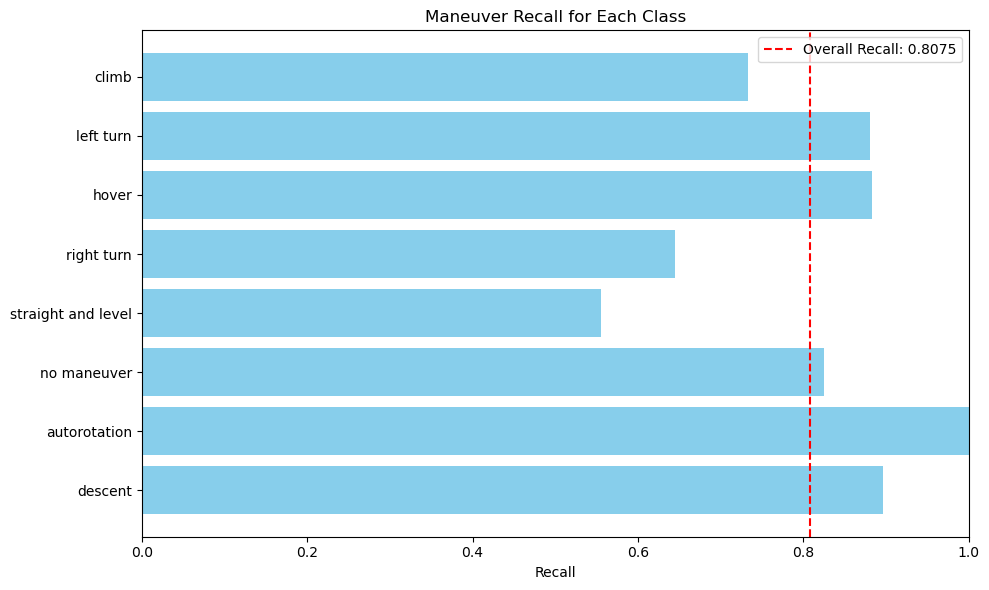

In [74]:
compute_maneuver_recall(rf_model, test_file_paths,possible_maneuvers)

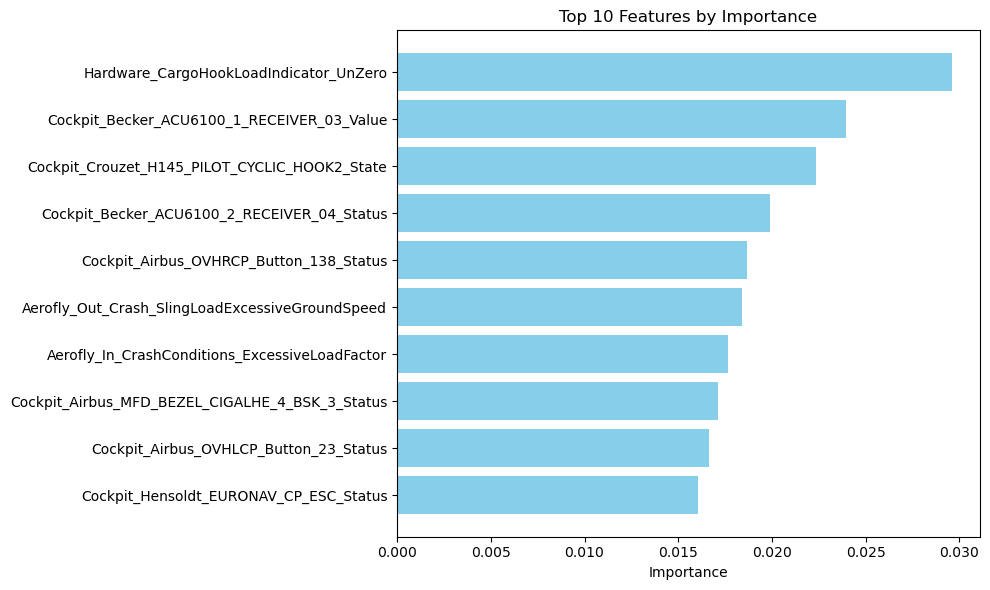

In [78]:
# Step 1: Load the state_descriptions_analysis.csv to get the feature names
feature_names_df = pd.read_csv('state_descriptions_analysis.csv')

stateid_to_name = dict(zip(feature_names_df['StateID'], feature_names_df['Name']))

# Step 2: Get the feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Step 3: Map the importances to feature names
sorted_importances = sorted(
    zip(feature_importances, stateid_to_name.values()), 
    reverse=True
)
top_features = sorted_importances[:10]  # Top 10 features

# Unzip the sorted importances and feature names
top_importance_values, top_feature_names = zip(*top_features)

# Step 4: Visualization: Bar chart for top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_importance_values, color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features by Importance')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.tight_layout()
plt.show()

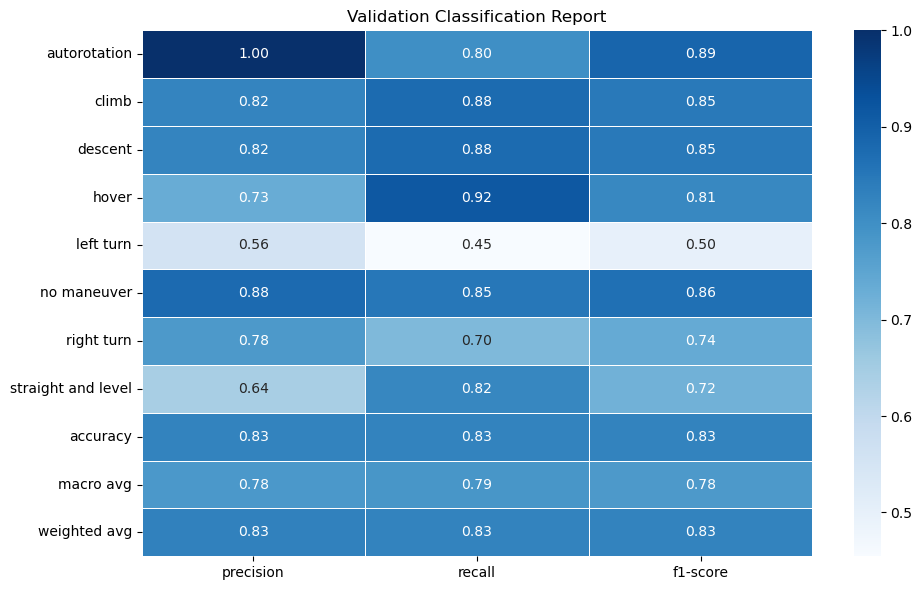

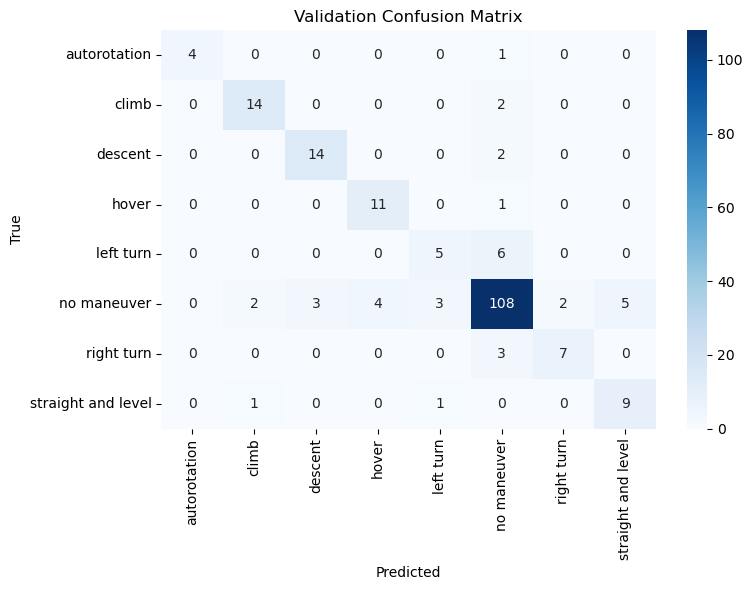

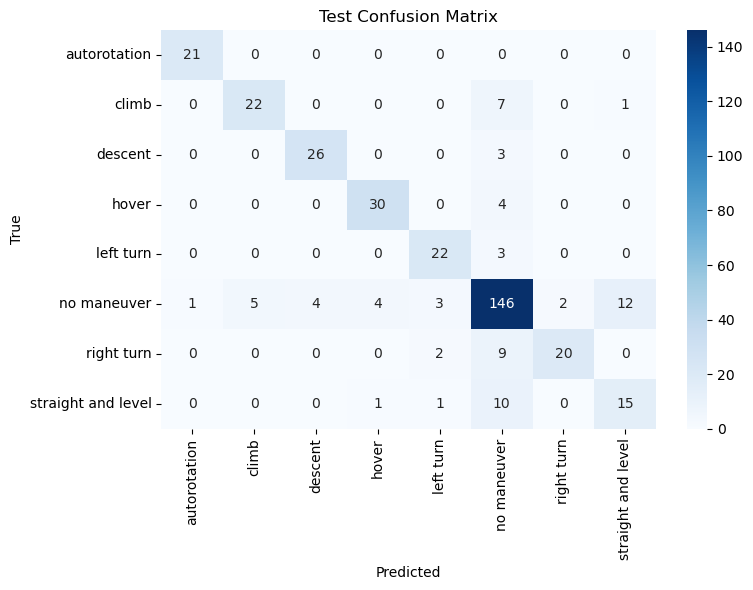

In [81]:
import seaborn as sns

# Plot the Classification Report as a Heatmap for Validation
# Convert the classification report to a DataFrame for better visualization
report_df_val = pd.DataFrame(classification_report(y_val, y_pred_val, output_dict=True)).T
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_val[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Validation Classification Report')
plt.tight_layout()
plt.show()

# Plot the Confusion Matrix for Validation
def plot_confusion_matrix(cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

# Plotting confusion matrix for validation
plot_confusion_matrix(cm_val, labels, title='Validation Confusion Matrix')

# Optionally, plot confusion matrix for test set
plot_confusion_matrix(cm_test, labels, title='Test Confusion Matrix')


In [79]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

rf_model_1 = RandomForestClassifier(random_state=42)
rf_model_1.fit(X_resampled, y_resampled)


validate_model(rf_model_1, validate_file_paths)

test_model(rf_model_1, test_file_paths)

Validation Classification Report:
Confusion Matrix:
[[  5   0   0   0   0   0   0   0]
 [  0  16   0   0   0   0   0   0]
 [  0   0  16   0   0   0   0   0]
 [  0   0   0  12   0   0   0   0]
 [  0   0   0   0  11   0   0   0]
 [  0   0   0   0   0 127   0   0]
 [  0   0   0   0   0   0  10   0]
 [  0   0   0   0   0   0   0  11]]
Test Classification Report:
                    precision    recall  f1-score   support

      autorotation       0.95      1.00      0.98        21
             climb       0.71      0.83      0.77        30
           descent       0.84      0.93      0.89        29
             hover       0.75      0.97      0.85        34
         left turn       0.79      0.92      0.85        25
       no maneuver       0.87      0.73      0.79       177
        right turn       0.86      0.81      0.83        31
straight and level       0.53      0.67      0.59        27

          accuracy                           0.80       374
         macro avg       0.79      0.

(0      no maneuver
 1      no maneuver
 2      no maneuver
 3      no maneuver
 4      no maneuver
           ...     
 369    no maneuver
 370    no maneuver
 371    no maneuver
 372    no maneuver
 373    no maneuver
 Name: most_frequent_label, Length: 374, dtype: object,
 array(['no maneuver', 'no maneuver', 'no maneuver', 'no maneuver',
        'no maneuver', 'no maneuver', 'hover', 'hover', 'hover',
        'no maneuver', 'climb', 'climb', 'climb', 'no maneuver',
        'left turn', 'left turn', 'left turn', 'right turn', 'right turn',
        'right turn', 'right turn', 'no maneuver', 'no maneuver',
        'descent', 'descent', 'descent', 'no maneuver', 'no maneuver',
        'no maneuver', 'autorotation', 'autorotation', 'autorotation',
        'no maneuver', 'no maneuver', 'no maneuver', 'no maneuver',
        'no maneuver', 'no maneuver', 'no maneuver', 'no maneuver',
        'no maneuver', 'no maneuver', 'hover', 'hover', 'hover', 'hover',
        'hover', 'hover', 'no man

Overall Maneuver Recall: 0.8048
Maneuver Recall for descent: 0.9310
Maneuver Recall for autorotation: 1.0000
Maneuver Recall for no maneuver: 0.7288
Maneuver Recall for straight and level: 0.6667
Maneuver Recall for right turn: 0.8065
Maneuver Recall for hover: 0.9706
Maneuver Recall for left turn: 0.9200
Maneuver Recall for climb: 0.8333


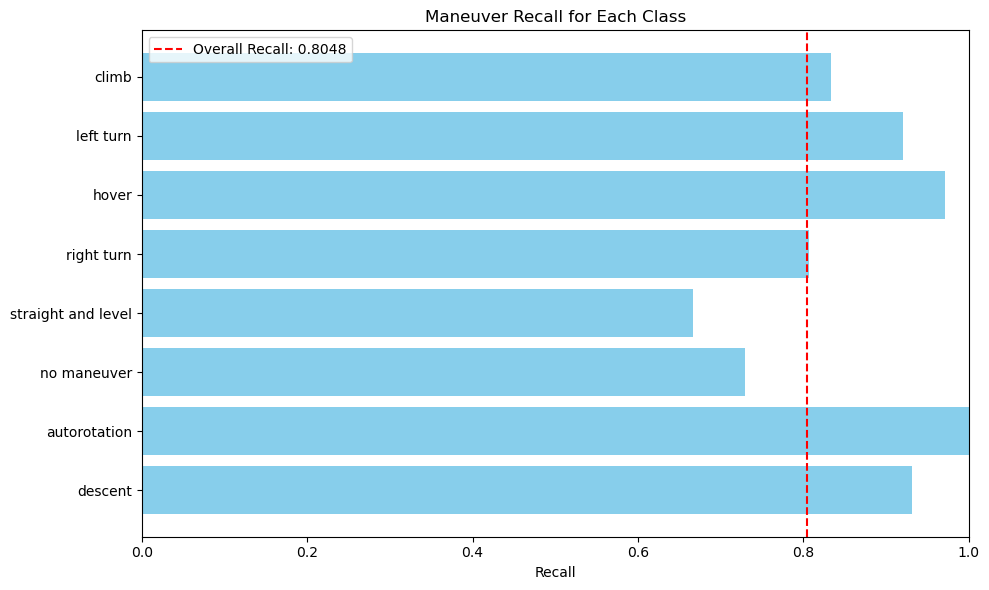

In [84]:
compute_maneuver_recall(rf_model_1, test_file_paths,possible_maneuvers)